In [7]:
#load the data
import numpy as np

# Load the array from the .npy file
labels_array = np.load('processing_dataset/labels.npy')
print("Labels loaded")
# Convert the array back to a list of strings
labels = list(labels_array)

spectrograms = np.load("final_dataset/spectrograms.npy")
print("Spectrogramms loaded")

padded_soundwaves = np.load("processing_dataset/padded_soundwaves.npy")
print( "Padded soundwaves loaded")

all_chunks = np.load("processing_dataset/all_chunks.npy",allow_pickle=True)
print( "all audios chunked loaded")


Labels loaded
Spectrogramms loaded
Padded soundwaves loaded
all audios chunked loaded


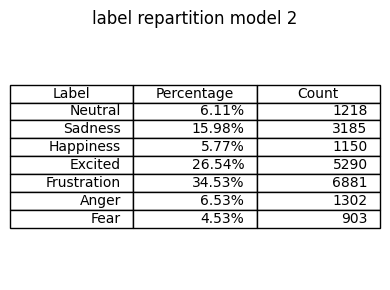

In [4]:
#visualisation - label repartition chunked

import collections
import matplotlib.pyplot as plt
total_labels = len(labels)

label_counts = collections.Counter(list(labels))

total_labels = len(labels)

data = []
for label, count in label_counts.items():
    percentage = (count / total_labels) * 100
    data.append([label,  f"{percentage:.2f}%",count])

headers = ["Label", "Percentage", "Count"]

fig, ax = plt.subplots(figsize=(4, 3))
ax.axis("off")
ax.axis("tight")
ax.table(cellText=data, colLabels=headers, loc="center")
plt.title("label repartition model 2")
plt.tight_layout()
plt.show()

In [ ]:
#plot example soundwave and spectrogram

import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import wave
obj = wave.open('../audio/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav', 'rb')
print('Parameters:', obj.getparams())
sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)
duration = n_samples/sample_freq
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
time = np.linspace(0, duration, num=n_samples)

plt.figure(figsize=(15, 5))
plt.plot(time, signal_array)
plt.title('Ses01F_impro01_F000.wav')
plt.ylabel('Audio wave')
plt.xlabel('time (s)')
plt.show()

signal_array = signal_array.astype(np.float32) / np.max(np.abs(signal_array))
sr = 22050
n_fft = 2048
mel_spec = librosa.feature.melspectrogram(y=signal_array, sr=sr, n_fft=n_fft, hop_length=int(n_fft/2))
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # convert to decibel scale
    # plot the MEL spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=int(n_fft/2), x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('MEL Spectrogram of Ses01F_impro01_F000.wav')
plt.tight_layout()
plt.show()